<a href="https://colab.research.google.com/github/pisceno/algoritmos/blob/master/PCA_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Cargar los datos
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Verificar la estructura de los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Seleccionar variables para el PCA excluyendo 'Id' y 'species'
X = df.drop(['species'], axis=1)

# Normalizar los datos
X_std = StandardScaler().fit_transform(X)
X_std_df = pd.DataFrame(X_std, columns=X.columns)
X_std_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
#X_std
y = df['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDf = pd.concat([principalDf, df[['species']]], axis=1)
principalDf.info()
principalDf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC1      150 non-null    float64
 1   PC2      150 non-null    float64
 2   species  150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


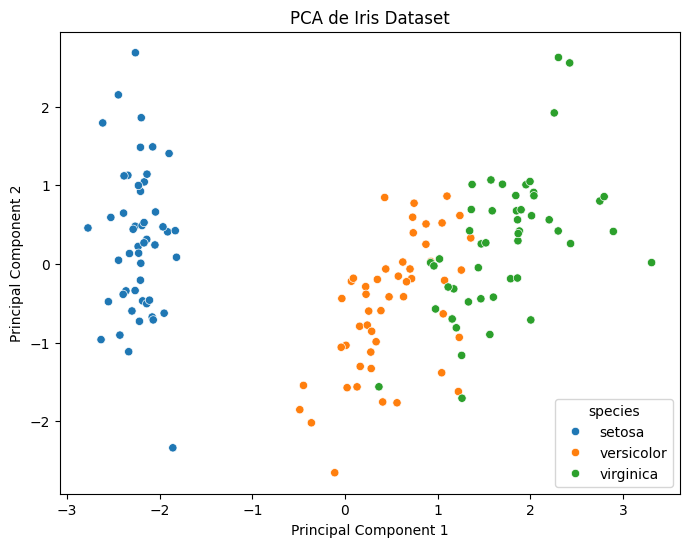

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=principalDf)
plt.title('PCA de Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Obtener los loadings de los componentes principales
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=X.columns)
print(loadings_df)

   sepal_length  sepal_width  petal_length  petal_width
0      0.521066    -0.269347      0.580413     0.564857
1      0.377418     0.923296      0.024492     0.066942


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Dividir en conjunto de entrenamiento y conjunto de pruebas
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Crear el clasificador
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Evaluar el rendimiento del clasificador
score = clf.score(X_test_pca, y_test)
print("Accuracy:", score)


Accuracy: 1.0


In [ ]:
# Varianza explicada por cada componente
explained_variances = pca.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variances)

print("Varianza explicada por cada componente:")
print(explained_variances)

print("Varianza acumulada:")
print(cumulative_variance)

# Verificar cuántas componentes capturan el 95% de la varianza
num_components_for_95_variance = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Se necesitan {num_components_for_95_variance} componentes para capturar el 95% de la variabilidad.")


Varianza explicada por cada componente:
[0.71537436 0.24083209 0.03901736 0.00477619]
Varianza acumulada:
[0.71537436 0.95620645 0.99522381 1.        ]
Se necesitan 2 componentes para capturar el 95% de la variabilidad.


In [ ]:
explained_variances

array([0.71537436, 0.24083209, 0.03901736])